                   Analysis of Hungarian Stocks and Algorithmic Trading with Python
                        
                        * Backtesting MACD Strategy for OPT, MOL and RICHTER *

Imports:

In [1]:
import talib
from pandas_datareader import data, wb
from pandas.util.testing import assert_frame_equal
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

/home/pitzm/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Getting stock market data (5 years, daily frequence) using Pandas datareader from Stooq.com:
- OTP https://stooq.com/q/?s=otp.hu
- MOL https://stooq.com/q/?s=mol
- RICHTER https://stooq.com/q/?s=richter.hu




In [2]:
otp=data.DataReader('OTP.HU', 'stooq')

In [3]:
otp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2020-05-15 to 2015-05-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1241 non-null   float64
 1   High    1241 non-null   float64
 2   Low     1241 non-null   float64
 3   Close   1241 non-null   float64
 4   Volume  1241 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.2 KB


In [4]:
otp.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-15,9050.0,9120.0,8850.0,8850.0,517985
2020-05-14,9000.0,9090.0,8760.0,8875.0,727900
2020-05-13,9310.0,9345.0,9095.0,9095.0,557733
2020-05-12,9200.0,9395.0,9180.0,9365.0,502751
2020-05-11,9400.0,9475.0,9160.0,9275.0,637460


In [5]:
mol=data.DataReader('MOL.HU', 'stooq')

In [6]:
mol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2020-05-15 to 2015-05-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1242 non-null   float64
 1   High    1242 non-null   float64
 2   Low     1242 non-null   float64
 3   Close   1242 non-null   float64
 4   Volume  1242 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.2 KB


In [7]:
mol.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-15,2026.0,2042.0,1995.0,1995.0,666164
2020-05-14,1998.0,2030.0,1980.0,1992.0,1037520
2020-05-13,2054.0,2062.0,1990.0,2000.0,1057996
2020-05-12,2050.0,2080.0,2046.0,2050.0,980658
2020-05-11,2060.0,2082.0,2048.0,2048.0,617383


In [8]:
richter=data.DataReader('RICHTER.HU', 'stooq')

In [9]:
richter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2020-05-15 to 2015-05-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1242 non-null   float64
 1   High    1242 non-null   float64
 2   Low     1242 non-null   float64
 3   Close   1242 non-null   float64
 4   Volume  1242 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.2 KB


In [10]:
richter.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-15,6935.0,6950.0,6815.0,6875.0,191050
2020-05-14,6935.0,6950.0,6835.0,6935.0,379068
2020-05-13,6990.0,6990.0,6920.0,6935.0,240369
2020-05-12,6960.0,7095.0,6855.0,7015.0,486709
2020-05-11,7000.0,7150.0,6910.0,6945.0,420778


Creating a single dataframe:

In [11]:
tickers=['OTP', 'MOL', 'RICHTER']
stocks = pd.concat([otp, mol,richter],axis=1,keys=tickers)
stocks.columns.names = ['Bank Ticker','Stock Info']

In [12]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2015-05-20 to 2020-05-15
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (OTP, Open)        1241 non-null   float64
 1   (OTP, High)        1241 non-null   float64
 2   (OTP, Low)         1241 non-null   float64
 3   (OTP, Close)       1241 non-null   float64
 4   (OTP, Volume)      1241 non-null   float64
 5   (MOL, Open)        1242 non-null   float64
 6   (MOL, High)        1242 non-null   float64
 7   (MOL, Low)         1242 non-null   float64
 8   (MOL, Close)       1242 non-null   float64
 9   (MOL, Volume)      1242 non-null   int64  
 10  (RICHTER, Open)    1242 non-null   float64
 11  (RICHTER, High)    1242 non-null   float64
 12  (RICHTER, Low)     1242 non-null   float64
 13  (RICHTER, Close)   1242 non-null   float64
 14  (RICHTER, Volume)  1242 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 155.2 KB


After deleting the one row where OTP has no value, we have 1242 rows.

In [13]:
stocks.dropna(inplace=True)

We can calculate returns for each stock:

In [14]:
returns=pd.DataFrame()
for tick in tickers:
    returns[tick]=stocks[tick]['Close'].pct_change()
returns.tail()    

,OTP,MOL,RICHTER
Date,,,
2020-05-11,0.002703,0.002938,0.005793
2020-05-12,0.009704,0.000977,0.010079
2020-05-13,-0.028831,-0.024390,-0.011404
2020-05-14,-0.024189,-0.004000,0.000000
2020-05-15,-0.002817,0.001506,-0.008652


Now we can analyse the data:

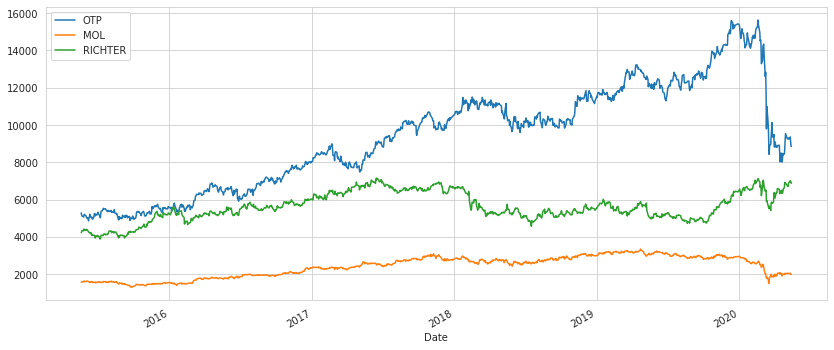

In [15]:
for tick in tickers:
    stocks[tick]['Close'].plot(figsize=(14,6),label=tick)
plt.legend()

An interactive plot using plotly and cufflinks:

In [16]:
stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

Impact of COVID 19 can be seen:

In [17]:
returns.idxmin()

OTP       2020-03-12
MOL       2020-03-09
RICHTER   2020-03-12
dtype: datetime64[ns]

In [18]:
returns.idxmax()

OTP       2020-03-13
MOL       2020-03-20
RICHTER   2020-03-02
dtype: datetime64[ns]

Calculating standard deviation to measure risk: 

In [19]:
returns.std()

OTP        0.017496
MOL        0.016291
RICHTER    0.015068
dtype: float64

Smoothening out the fluctuations with 30 and 100 day simple moving averages against the close prices (2016-2020), we can see the end of the downtrend casued by COVID 19:

Text(0.5, 1.0, 'OTP Moving Averages')

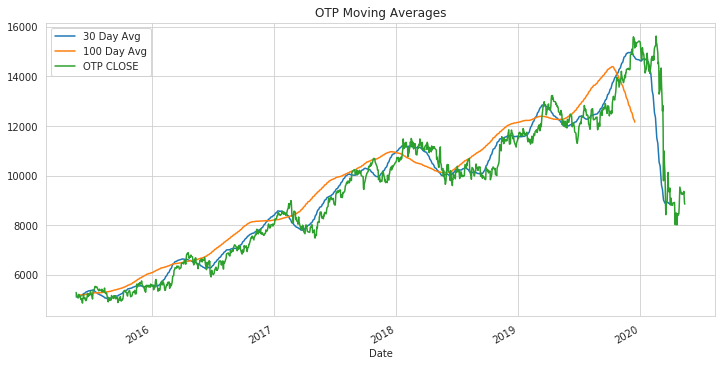

In [20]:
plt.figure(figsize=(12,6))
otp['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
otp['Close'].rolling(window=100).mean().plot(label='100 Day Avg')
otp['Close'].plot(label='OTP CLOSE')
plt.legend()
plt.title('OTP Moving Averages')


Text(0.5, 1.0, 'OTP Moving Averages')

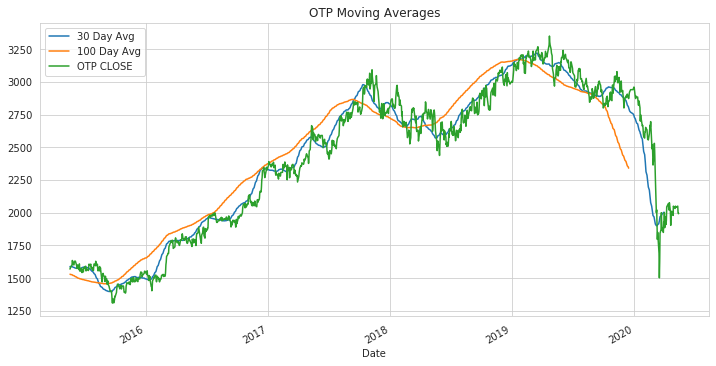

In [21]:
plt.figure(figsize=(12,6))
mol['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
mol['Close'].rolling(window=100).mean().plot(label='100 Day Avg')
mol['Close'].plot(label='OTP CLOSE')
plt.legend()
plt.title('OTP Moving Averages')

Text(0.5, 1.0, 'RICHTER Moving Averages')

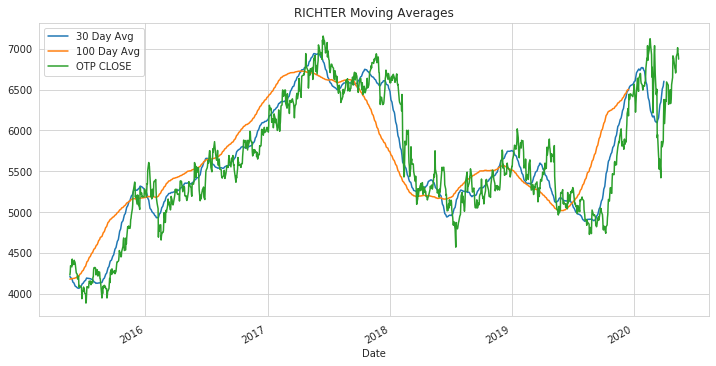

In [22]:
plt.figure(figsize=(12,6))
richter['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
richter['Close'].rolling(window=100).mean().plot(label='100 Day Avg')
richter['Close'].plot(label='OTP CLOSE')
plt.legend()
plt.title('RICHTER Moving Averages')

Setting up database for the strategy (past year):

In [23]:
len(otp['Close'].loc[:'2019-05-17'])

247

In [69]:
strategy=pd.DataFrame(index=otp.index)

strategy['otp']=otp['Close'].iloc[:247]
strategy['mol']=mol['Close'].iloc[:247]
strategy['richter']=richter['Close'].iloc[:247]
strategy.dropna(inplace=True)


Text(0.5, 1.0, 'OTP Exponantial moving averages')

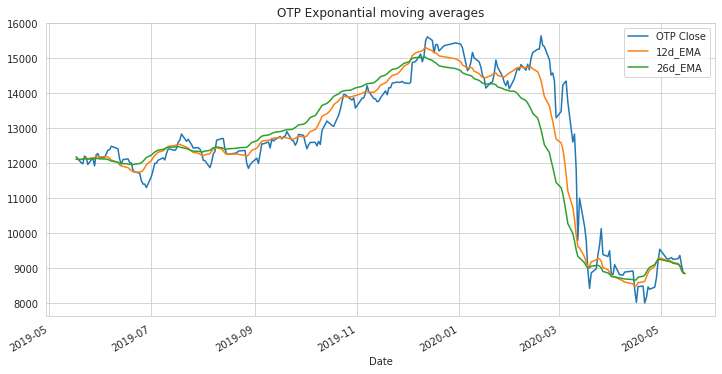

In [70]:
strategy['otp 12d_EMA'] = strategy.otp.ewm(span=12).mean()
strategy['otp 26d_EMA'] = strategy.otp.ewm(span=26).mean()
plt.figure(figsize=(12,6))
strategy['otp'].plot(label='OTP Close')
strategy['otp 12d_EMA'].plot(label='12d_EMA')
strategy['otp 26d_EMA'].plot(label='26d_EMA')
plt.legend()
plt.title('OTP Exponantial moving averages')

Text(0.5, 1.0, 'MOL Exponantial moving averages')

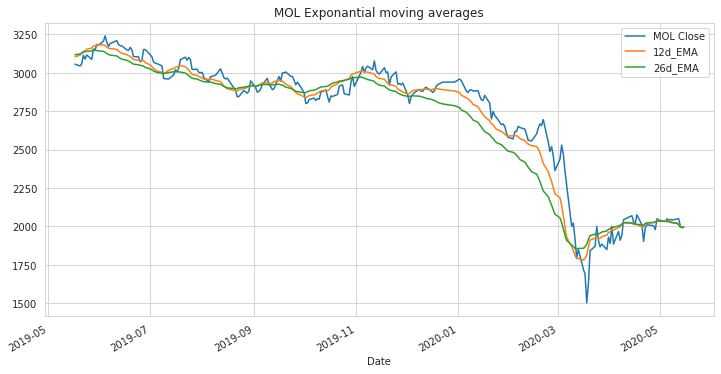

In [71]:
strategy['mol 12d_EMA'] = strategy.mol.ewm(span=12).mean()
strategy['mol 26d_EMA'] = strategy.mol.ewm(span=26).mean()
plt.figure(figsize=(12,6))
strategy['mol'].plot(label='MOL Close')
strategy['mol 12d_EMA'].plot(label='12d_EMA')
strategy['mol 26d_EMA'].plot(label='26d_EMA')
plt.legend()
plt.title('MOL Exponantial moving averages')

Text(0.5, 1.0, 'RICHTER Exponantial moving averages')

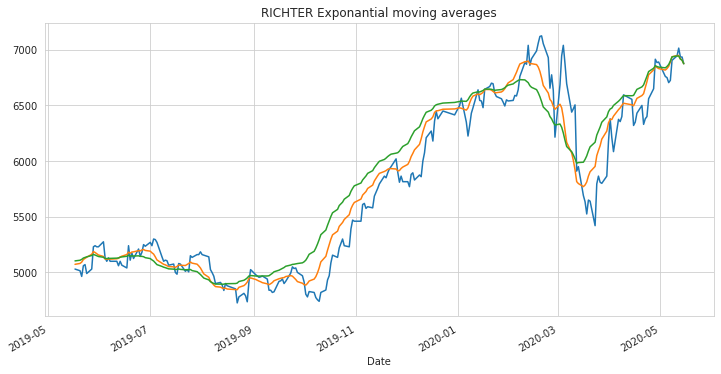

In [72]:
strategy['richter 12d_EMA'] = strategy.richter.ewm(span=12).mean()
strategy['richter 26d_EMA'] = strategy.richter.ewm(span=26).mean()
plt.figure(figsize=(12,6))
strategy['richter'].plot(label='Richter Close')
strategy['richter 12d_EMA'].plot(label='12d_EMA')
strategy['richter 26d_EMA'].plot(label='26d_EMA')
plt.title('RICHTER Exponantial moving averages')

Calculating Moving Average Convergence Divergence (MACD) and Signal line for the strategy:
 - if MACD > Signal -> buy
 - if MACD < Signal -> sell

In [73]:
strategy['OTPMACD'] = strategy['otp 26d_EMA'] - strategy['otp 12d_EMA']
strategy['MOLMACD'] = strategy['mol 26d_EMA'] - strategy['mol 12d_EMA']
strategy['RICHTERMACD'] = strategy['richter 26d_EMA'] - strategy['richter 12d_EMA']
strategy['OTP Signal'] = strategy.OTPMACD.ewm(span=9).mean()
strategy['MOL Signal'] = strategy.MOLMACD.ewm(span=9).mean()
strategy['RICHTER Signal'] = strategy.RICHTERMACD.ewm(span=9).mean()

In [74]:
strategy['otp_trading_signal'] = np.where(strategy['OTPMACD'] > strategy['OTP Signal'], 1, -1)
strategy['mol_trading_signal'] = np.where(strategy['MOLMACD'] > strategy['MOL Signal'], 1, -1)
strategy['richter_trading_signal'] = np.where(strategy['RICHTERMACD'] > strategy['RICHTER Signal'], 1, -1)

Backtesting:

In [79]:
backtesting=pd.DataFrame()
backtesting['otp_returns'] = returns['OTP'].iloc[994:]
backtesting['otp_strategy_returns'] = backtesting.otp_returns * strategy.otp_trading_signal.shift(1)
cumulative_returns_otp = (backtesting.otp_strategy_returns + 1).cumprod()-1
backtesting['mol_returns'] = returns['MOL'].iloc[994:]
backtesting['mol_strategy_returns'] = backtesting.mol_returns * strategy.mol_trading_signal.shift(1)
cumulative_returns_mol = (backtesting.mol_strategy_returns + 1).cumprod()-1
backtesting['richter_returns'] = returns['RICHTER'].iloc[994:]
backtesting['richter_strategy_returns'] = backtesting.richter_returns * strategy.richter_trading_signal.shift(1)
cumulative_returns_richter = (backtesting.richter_strategy_returns + 1).cumprod()-1

In [80]:
backtesting['otp_strategy_returns']

Date
2019-05-17   -0.004088
2019-05-20   -0.013957
2019-05-21   -0.002498
2019-05-22    0.018364
2019-05-23   -0.003279
                ...   
2020-05-11   -0.002703
2020-05-12   -0.009704
2020-05-13    0.028831
2020-05-14    0.024189
2020-05-15         NaN
Name: otp_strategy_returns, Length: 247, dtype: float64

Text(0.5, 1.0, 'Strategy Returns')

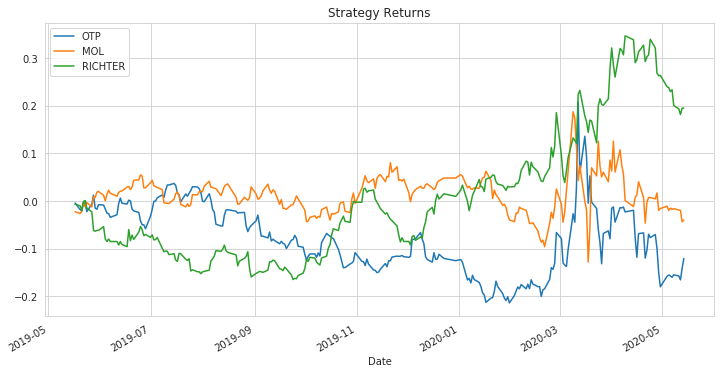

In [81]:
plt.figure(figsize=(12,6))
cumulative_returns_otp.plot(label='OTP')
cumulative_returns_mol.plot(label='MOL')
cumulative_returns_richter.plot(label='RICHTER')
plt.legend()
plt.title('Strategy Returns')

Evaluation of the trading strategy with annualised return and volatility:

In [94]:
trading_days = 247
otp_annual_returns = ((1 + backtesting.otp_returns.mean())**(trading_days) - 1)*100
mol_annual_returns = ((1 + backtesting.mol_returns.mean())**(trading_days)-1)*100
richter_annual_returns = ((1 + backtesting.richter_returns.mean())**(trading_days)-1)*100
otp_annual_volatility = backtesting.otp_returns.std() * np.sqrt(trading_days) * 100
mol_annual_volatility =backtesting.mol_returns.std() * np.sqrt(trading_days)*100
richter_annual_volatility=backtesting.richter_returns.std() * np.sqrt(trading_days)*100

In [95]:
risk_free_rate = 0.035
daily_risk_free_return = risk_free_rate/trading_days
excess_daily_returns_otp = backtesting.otp_returns - daily_risk_free_return
sharpe_ratio_otp = (excess_daily_returns_otp.mean() /
                excess_daily_returns_otp.std()) * np.sqrt(trading_days)
excess_daily_returns_mol = backtesting.mol_returns - daily_risk_free_return
sharpe_ratio_mol = (excess_daily_returns_mol.mean() /
                excess_daily_returns_mol.std()) * np.sqrt(trading_days)
excess_daily_returns_richter = backtesting.richter_returns - daily_risk_free_return
sharpe_ratio_richter = (excess_daily_returns_richter.mean() /
                excess_daily_returns_richter.std()) * np.sqrt(trading_days)


Annual growth rate, volatility and Sharpe ratio without the strategy:

In [96]:
print('The annualised return for OTP is %.2f%%' % otp_annual_returns)
print('The annualised return for MOL is %.2f%%' % mol_annual_returns)
print('The annualised return for RICHTER is %.2f%%' % richter_annual_returns)
print('The annualised volatility for OTP is %.2f%%' % otp_annual_volatility)
print('The annualised volatility for MOL is %.2f%%' % mol_annual_volatility)
print('The annualised volatility for RICHTER is %.2f%%' % richter_annual_volatility)
print('The Sharpe ratio for OTP is %.2f' % sharpe_ratio_otp)
print('The Sharpe ratio for MOL is %.2f' % sharpe_ratio_mol)
print('The Sharpe ratio for RICHTER is %.2f' % sharpe_ratio_richter)

The annualised return for OTP is -21.32%
The annualised return for MOL is -31.71%
The annualised return for RICHTER is 41.31%
The annualised volatility for OTP is 40.38%
The annualised volatility for MOL is 36.78%
The annualised volatility for RICHTER is 28.43%
The Sharpe ratio for OTP is -0.68
The Sharpe ratio for MOL is -1.13
The Sharpe ratio for RICHTER is 1.09


In [97]:
otp_annual_strategy_returns = ((1 + backtesting.otp_strategy_returns.mean())**(trading_days) - 1)*100
mol_annual_strategy_returns = ((1 + backtesting.mol_strategy_returns.mean())**(trading_days)-1)*100
richter_annual_strategy_returns = ((1 + backtesting.richter_strategy_returns.mean())**(trading_days)-1)*100
otp_annual_strategy_volatility = backtesting.otp_strategy_returns.std() * np.sqrt(trading_days) * 100
mol_annual_strategy_volatility =backtesting.mol_strategy_returns.std() * np.sqrt(trading_days)*100
richter_annual_strategy_volatility=backtesting.richter_strategy_returns.std() * np.sqrt(trading_days)*100

In [98]:
risk_free_rate = 0.035
daily_risk_free_return = risk_free_rate/trading_days
excess_daily_returns_strat_otp = backtesting.otp_strategy_returns - daily_risk_free_return
sharpe_ratio_strategy_otp = (excess_daily_returns_strat_otp.mean() /
                excess_daily_returns_strat_otp.std()) * np.sqrt(trading_days)
excess_daily_returns_strat_mol = backtesting.mol_strategy_returns - daily_risk_free_return
sharpe_ratio_strategy_mol = (excess_daily_returns_strat_mol.mean() /
                excess_daily_returns_strat_mol.std()) * np.sqrt(trading_days)
excess_daily_returns_strat_richter = backtesting.richter_strategy_returns - daily_risk_free_return
sharpe_ratio_strategy_richter = (excess_daily_returns_strat_richter.mean() /
                excess_daily_returns_strat_richter.std()) * np.sqrt(trading_days)


Results of the strategy for the past year:

In [99]:
print('The annualised return for OTP is %.2f%%' % otp_annual_strategy_returns)
print('The annualised return for MOL is %.2f%%' % mol_annual_strategy_returns)
print('The annualised return for RICHTER is %.2f%%' % richter_annual_strategy_returns)
print('The annualised volatility for OTP is %.2f%%' % otp_annual_strategy_volatility)
print('The annualised volatility for MOL is %.2f%%' % mol_annual_strategy_volatility)
print('The annualised volatility for RICHTER is %.2f%%' % richter_annual_strategy_volatility)
print('The Sharpe ratio for OTP is %.2f' % sharpe_ratio_strategy_otp)
print('The Sharpe ratio for MOL is %.2f' % sharpe_ratio_strategy_mol)
print('The Sharpe ratio for RICHTER is %.2f' % sharpe_ratio_strategy_richter)

The annualised return for OTP is -4.71%
The annualised return for MOL is 2.68%
The annualised return for RICHTER is 24.45%
The annualised volatility for OTP is 40.49%
The annualised volatility for MOL is 36.94%
The annualised volatility for RICHTER is 28.53%
The Sharpe ratio for OTP is -0.21
The Sharpe ratio for MOL is -0.02
The Sharpe ratio for RICHTER is 0.64
